<div class="alert alert-block alert-success">
    <h1 align="center">Prediction   in acute  poisoning  using machine learning techniques</h1>
    
</div>

# Topics:

- [ ] Importing the libraries
- [ ] Importing the dataset
- [ ] Missing values
- [ ] Encoding categorical data
- - [ ] Encoding the Independent Variable
- - [ ] Encoding the Dependent Variable
- [ ] Splitting the dataset into the Training set and Test set
- [ ] Feature Scaling

## Importing the libraries

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Let's Import the Packages...
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">load Data </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> 
</div>

In [3]:
#Let's Read csv file
# data = pd.read_csv("organ_final - corect -clean_class_param_end.csv")
# data = pd.read_csv("pralidoxime_level_param.csv")
data = pd.read_excel("Cheif_data_naloxan_for_Graph.xlsx")
#Show some records of dataframe
data.sample(5)

,Unnamed: 0,Sex,Age,time_duration,CoIngestion,GCS,sign,RR,SBP,DBP,...,PT,PTT,INR,Bullos.Of.Naloxan,Naloxone_Maintenance,Hours_Of_Naloxan,Aspiration Pneomonia,ICU,class,Class_Hours_Naloxan
109,4,1,52,1.0,1,15,2,18,100,65,...,14.5,29.0,1.01,0.2,0.0,0.0,0,0,Less than 24 hours,0
153,164,0,19,23.0,0,3,4,5,115,48,...,15.6,28.4,1.16,1.2,62.2,48.0,1,1,more than 24 hours,1
206,160,0,50,9.0,1,8,4,10,150,100,...,14.5,33.6,1.04,1.2,28.8,48.0,0,0,more than 24 hours,1
19,49,1,20,2.0,0,15,0,12,120,60,...,13.9,27.0,0.96,0.4,0.8,2.0,0,0,Less than 24 hours,0
107,99,0,52,1.5,0,15,0,18,127,89,...,11.2,26.7,0.93,1.2,13.6,17.0,0,0,Less than 24 hours,0


<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">Prepare Data and EDA </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> 
</div>

## Prepare Data and EDA

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.index

RangeIndex(start=0, stop=221, step=1)

In [6]:
# describe inter or float data!!!
data.describe()

,Unnamed: 0,Sex,Age,time_duration,CoIngestion,GCS,sign,RR,SBP,DBP,...,CPK,PT,PTT,INR,Bullos.Of.Naloxan,Naloxone_Maintenance,Hours_Of_Naloxan,Aspiration Pneomonia,ICU,Class_Hours_Naloxan
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,...,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,110.000000,0.271493,36.488688,4.687783,0.343891,12.067873,1.959276,12.769231,116.864253,73.977376,...,481.108597,14.535294,33.663348,1.359276,1.060181,16.539412,24.759276,0.063348,0.153846,0.371041
std,63.941379,0.445739,16.825741,4.533440,0.476084,3.444351,1.799790,4.093915,18.313672,13.783865,...,658.667337,5.129081,22.484812,1.857617,0.874668,22.839843,29.603949,0.244142,0.361620,0.484180
min,0.000000,0.000000,12.000000,1.000000,0.000000,3.000000,0.000000,3.000000,70.000000,35.000000,...,15.000000,10.500000,0.900000,0.900000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,23.000000,2.000000,0.000000,10.000000,0.000000,10.000000,105.000000,68.000000,...,143.000000,12.500000,28.100000,1.010000,0.400000,1.600000,2.000000,0.000000,0.000000,0.000000
50%,110.000000,0.000000,32.000000,3.500000,0.000000,14.000000,1.000000,12.000000,120.000000,75.000000,...,480.000000,14.000000,31.700000,1.130000,0.800000,7.200000,18.000000,0.000000,0.000000,0.000000
75%,165.000000,1.000000,49.000000,4.000000,1.000000,15.000000,4.000000,16.000000,130.000000,80.000000,...,480.000000,14.500000,33.600000,1.300000,1.600000,24.000000,48.000000,0.000000,0.000000,1.000000
max,220.000000,1.000000,80.000000,23.000000,1.000000,15.000000,11.000000,26.000000,199.000000,106.000000,...,4246.000000,64.200000,266.700000,26.600000,4.800000,181.600000,240.000000,1.000000,1.000000,1.000000


In [7]:
data.shape

(221, 38)

 # Check columns list and missing values

In [8]:
# Check columns list and missing values
data.isnull().sum()

Unnamed: 0              0
Sex                     0
Age                     0
time_duration           0
CoIngestion             0
GCS                     0
sign                    0
RR                      0
SBP                     0
DBP                     0
PR                      0
T                       0
PH                      0
pCO2                    0
HCO3                    0
WBC                     0
Hb                      0
PLT                     0
Na                      0
K                       0
BS                      0
Cr                      0
BUN                     0
AST                     0
ALT                     0
ALP                     0
LDH                     0
CPK                     0
PT                      0
PTT                     0
INR                     0
Bullos.Of.Naloxan       0
Naloxone_Maintenance    0
Hours_Of_Naloxan        0
Aspiration Pneomonia    0
ICU                     0
class                   0
Class_Hours_Naloxan     0
dtype: int64

In [9]:
data.isnull().sum().sum() 

0

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">Visualization </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> 
</div>

## Visualization

In [ ]:
# --- Colors and Labels (Null Values Dropped) ---
data =ds
colors = olive_grad[0:5]
labels = ds['sign'].dropna().unique()
order = ds['sign'].value_counts().index

# --- Pie Chart ---
plt.figure(figsize = (15, 15))
plt.title('sign Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
plt.pie(ds['sign'].value_counts(), labels = order, colors = colors,
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%');

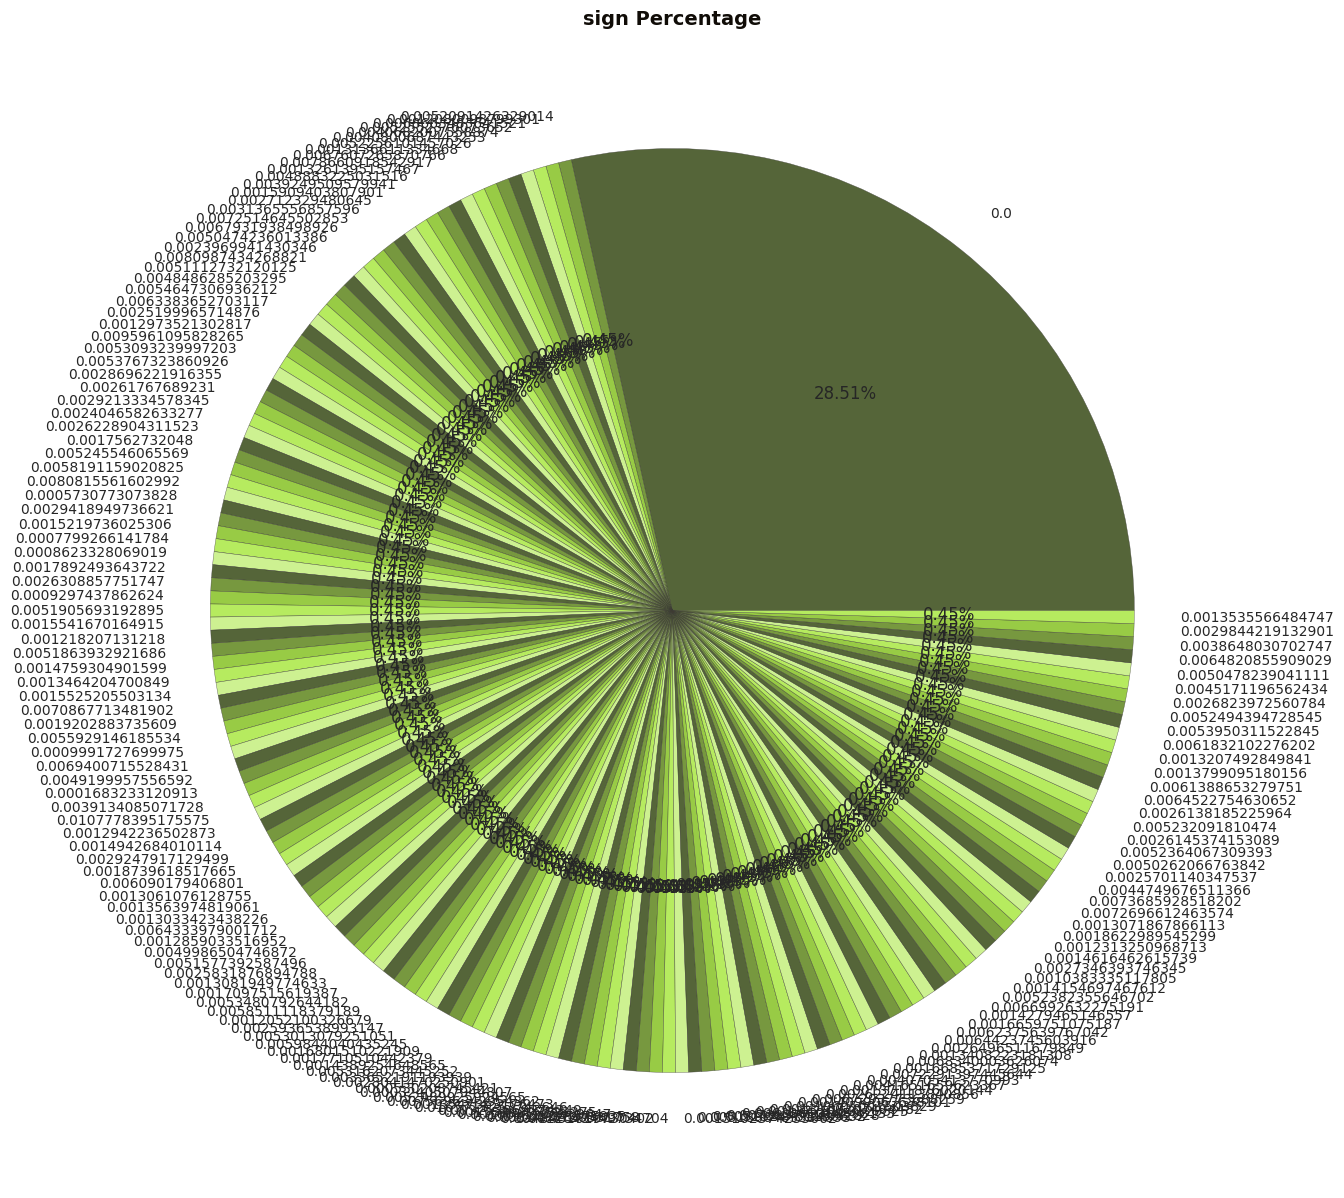

In [ ]:
# --- Colors and Labels (Null Values Dropped) ---
colors = olive_grad[0:5]
labels = ds['Bullos.Of.Naloxan'].dropna().unique()
order = ds['Bullos.Of.Naloxan'].value_counts().index

# --- Pie Chart ---
plt.figure(figsize = (15, 15))
plt.title('Bullos.Of.Naloxans Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
plt.pie(ds['Bullos.Of.Naloxan'].value_counts(), labels = order, colors = colors,
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%');

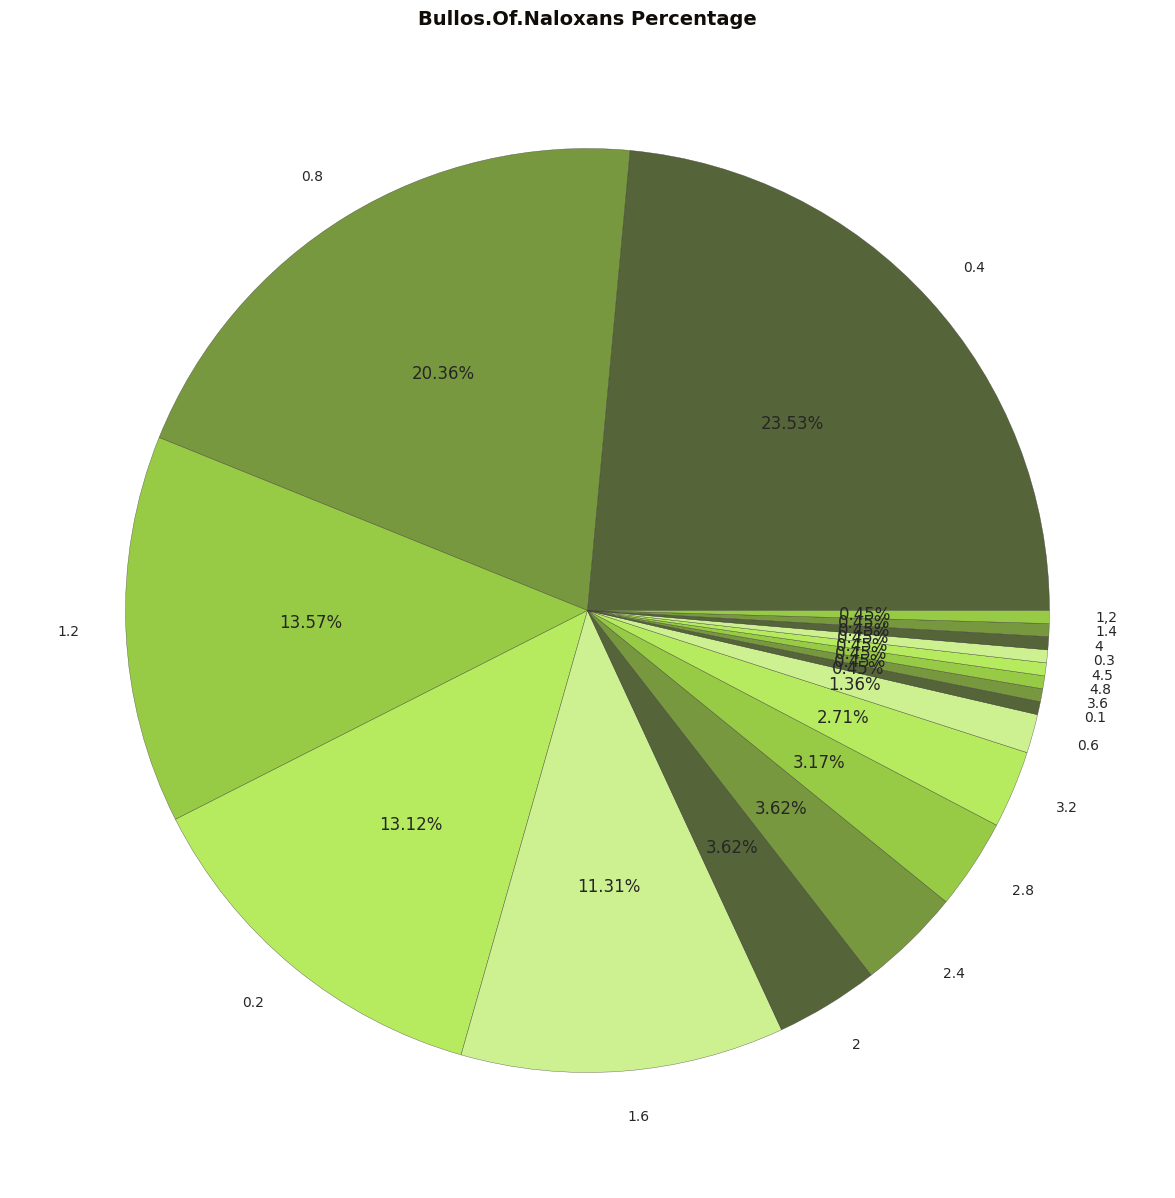

In [ ]:
# --- Plot Size ---
fig, axs = plt.subplots(2, 2, figsize = (10, 10))

# --- General Title ---
fig.tight_layout()
fig.subplots_adjust(top = 0.95)
fig.suptitle('Histogram of Continuous Columns', fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif',
             color = black_grad[0])

# --- Continuous Variables (Row 1) ---
sns.histplot(data = ds, x = 'Age', kde = True, ax = axs[0, 0], color = '#004D25')
sns.boxenplot(data = ds, x = 'Age', ax = axs[0, 1], color = '#004D25')

# --
sns.histplot(data = ds, x = 'Total_Naloxan', kde = True, ax = axs[1, 0], color = '#F2E880')
sns.boxenplot(data = ds, x = 'Total_Naloxan', ax = axs[1, 1], color = '#F2E880')

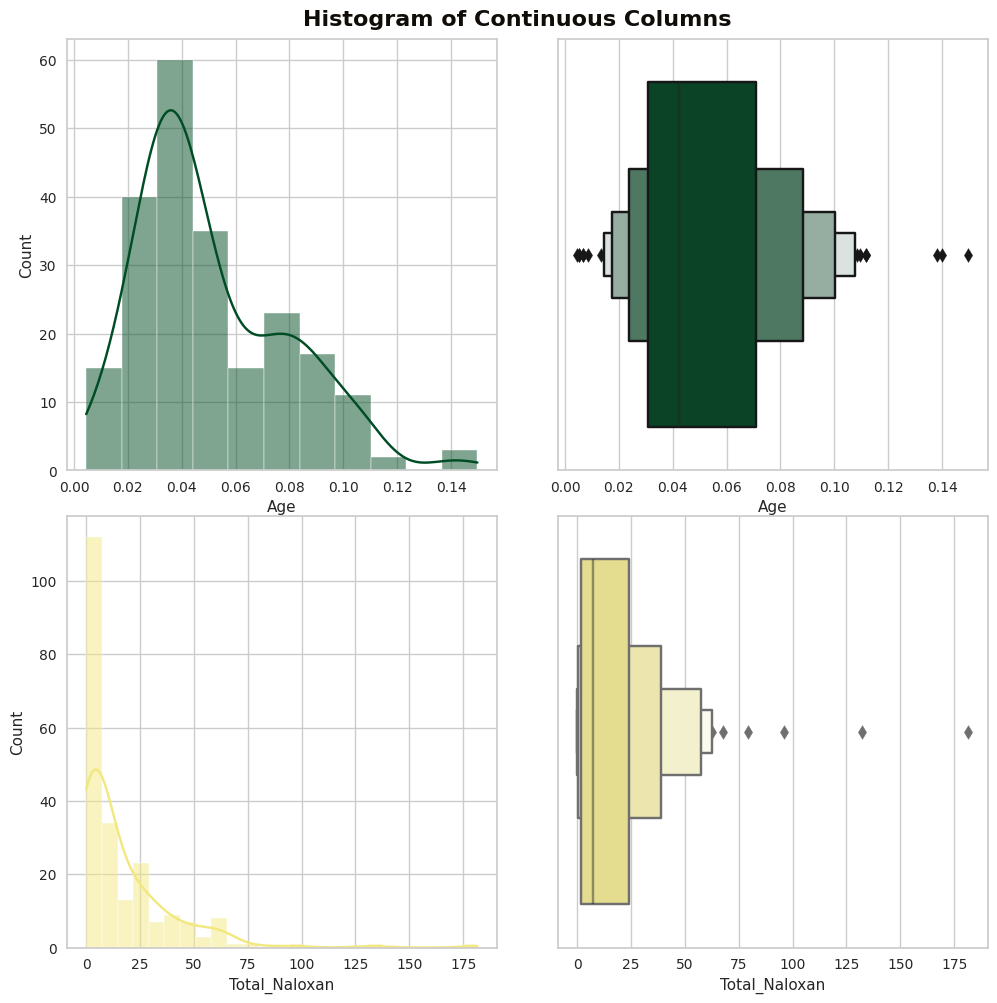

In [ ]:
# sns.displot(data,x="Total_Naloxan",shrink=0.8)

In [ ]:
# sns.displot(data,x="Bullos.Of.Naloxan",shrink=0.8)

In [ ]:
# sns.displot(data,x="days_of_admission",shrink=0.8)

In [ ]:
# sns.displot(data,x="Outcome",bins=2,shrink=0.8)

<AxesSubplot:xlabel='Hours_Of_Naloxan', ylabel='Naloxone_Maintenance'>

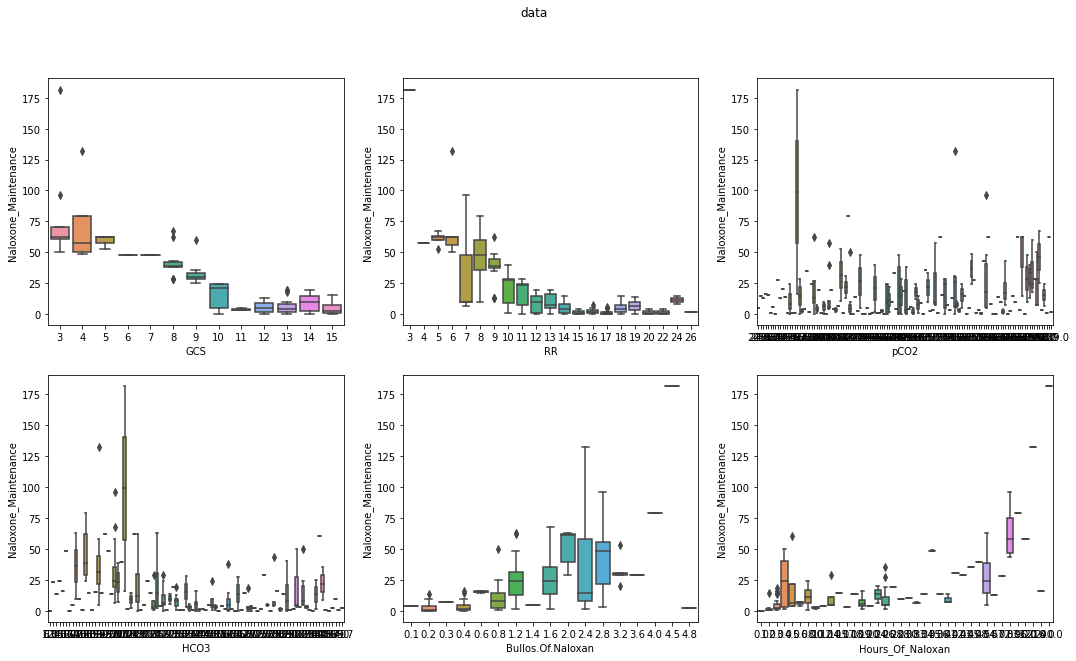

In [11]:
fig, axes = plt.subplots(2,3, figsize=(18, 10))
fig.suptitle('data')
data =data

sns.boxplot(ax=axes[0,0],data=data,y="Naloxone_Maintenance",x="GCS")
sns.boxplot(ax=axes[0,1],data=data,y="Naloxone_Maintenance",x ="RR")
sns.boxplot(ax=axes[0,2],data=data,y="Naloxone_Maintenance",x ="pCO2")
sns.boxplot(ax=axes[1,0],data=data,y="Naloxone_Maintenance",x ="HCO3")
sns.boxplot(ax=axes[1,1],data=data,y="Naloxone_Maintenance",x ="Bullos.Of.Naloxan")
sns.boxplot(ax=axes[1,2],data=data,y="Naloxone_Maintenance",x ="Hours_Of_Naloxan")


In [ ]:
# GCS,sign,RR,Hco3,Bullos.Of.Naloxan,ICU

<AxesSubplot:xlabel='ICU', ylabel='Naloxone_Maintenance'>

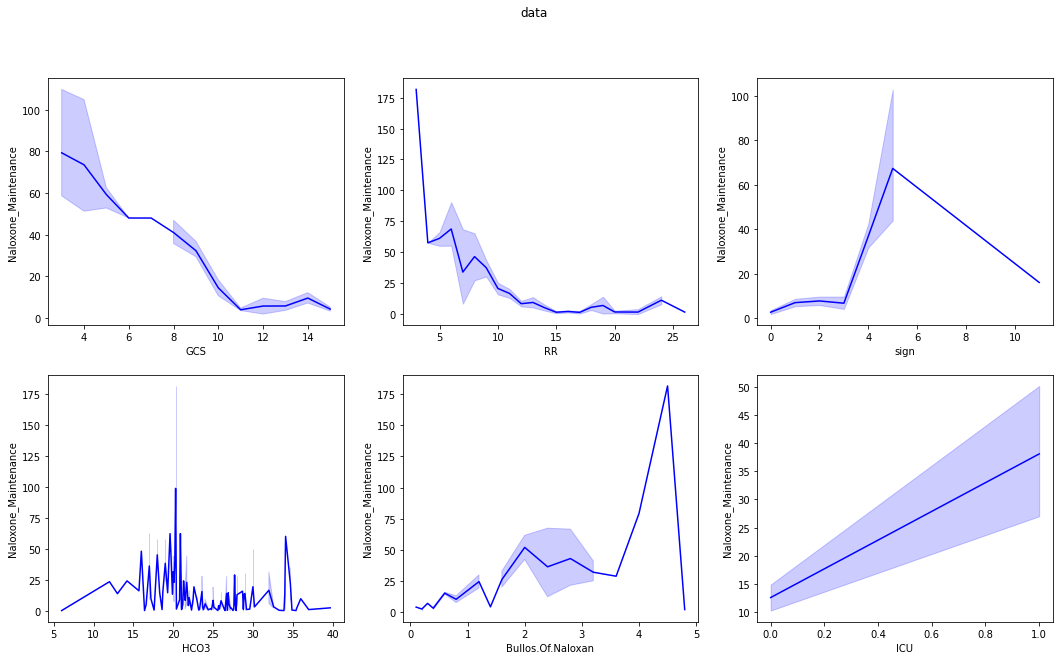

In [12]:
fig, axes = plt.subplots(2,3, figsize=(18, 10))
fig.suptitle('data')
data =data
sns.lineplot(ax=axes[0,0],data=data,y="Naloxone_Maintenance",x="GCS",color = 'blue')
sns.lineplot(ax=axes[0,1],data=data,y="Naloxone_Maintenance",x ="RR",color = 'blue')
sns.lineplot(ax=axes[0,2],data=data,y="Naloxone_Maintenance",x ="sign",color = 'blue')
sns.lineplot(ax=axes[1,0],data=data,y="Naloxone_Maintenance",x ="HCO3",color = 'blue')
sns.lineplot(ax=axes[1,1],data=data,y="Naloxone_Maintenance",x ="Bullos.Of.Naloxan",color = 'blue')
sns.lineplot(ax=axes[1,2],data=data,y="Naloxone_Maintenance",x ="ICU",color = 'blue')

In [ ]:
#  GCS,sign,RR,HCO3,Bullos.Of.Naloxan,T

<AxesSubplot:xlabel='T', ylabel='Class_Hours_Naloxan'>

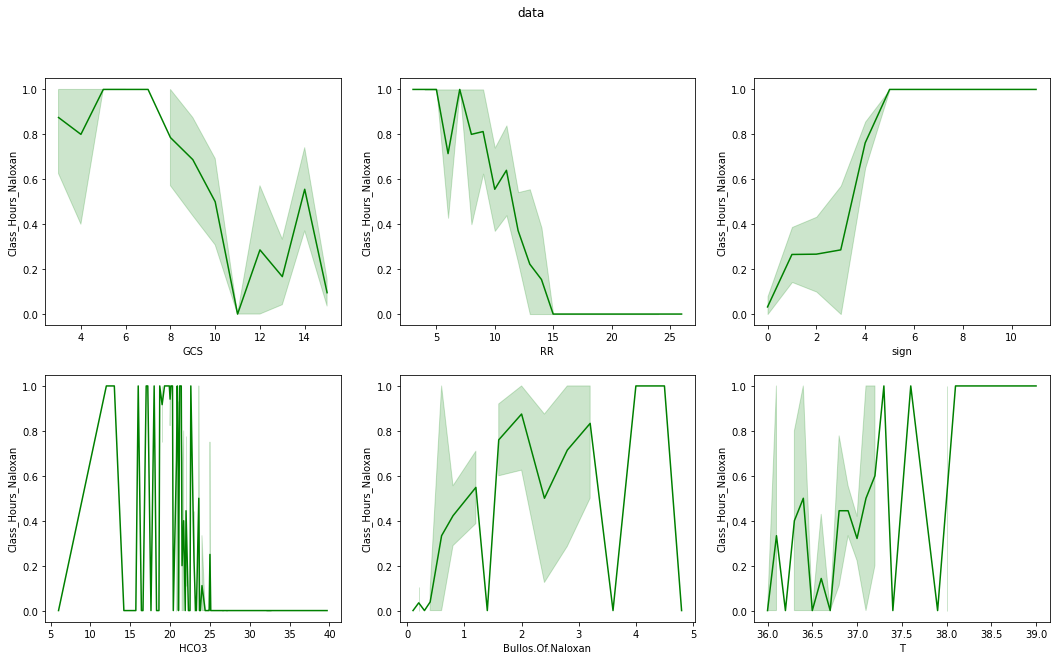

In [13]:
fig, axes = plt.subplots(2,3, figsize=(18, 10))
fig.suptitle('data')
data =data
sns.lineplot(ax=axes[0,0],data=data,y="Class_Hours_Naloxan",x="GCS",color = 'green')
sns.lineplot(ax=axes[0,1],data=data,y="Class_Hours_Naloxan",x ="RR",color = 'green')
sns.lineplot(ax=axes[0,2],data=data,y="Class_Hours_Naloxan",x ="sign",color = 'green')
sns.lineplot(ax=axes[1,0],data=data,y="Class_Hours_Naloxan",x ="HCO3",color = 'green')
sns.lineplot(ax=axes[1,1],data=data,y="Class_Hours_Naloxan",x ="Bullos.Of.Naloxan",color = 'green')
sns.lineplot(ax=axes[1,2],data=data,y="Class_Hours_Naloxan",x ="T",color = 'green')

<AxesSubplot:xlabel='T', ylabel='Hours_Of_Naloxan'>

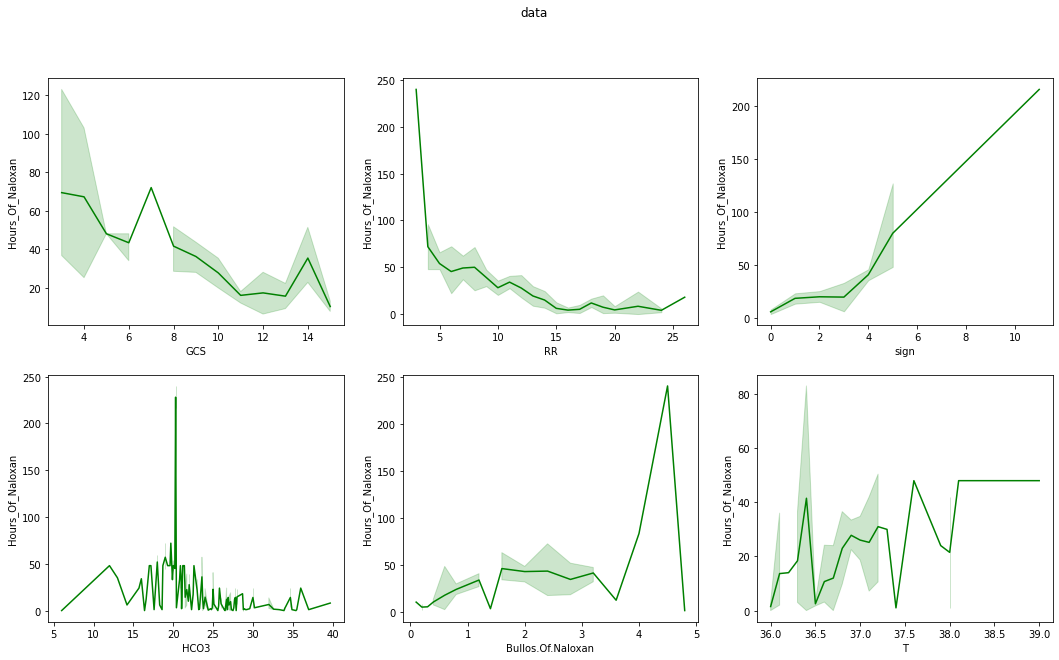

In [14]:
fig, axes = plt.subplots(2,3, figsize=(18, 10))
fig.suptitle('data')
data =data
sns.lineplot(ax=axes[0,0],data=data,y="Hours_Of_Naloxan",x="GCS",color = 'green')
sns.lineplot(ax=axes[0,1],data=data,y="Hours_Of_Naloxan",x ="RR",color = 'green')
sns.lineplot(ax=axes[0,2],data=data,y="Hours_Of_Naloxan",x ="sign",color = 'green')
sns.lineplot(ax=axes[1,0],data=data,y="Hours_Of_Naloxan",x ="HCO3",color = 'green')
sns.lineplot(ax=axes[1,1],data=data,y="Hours_Of_Naloxan",x ="Bullos.Of.Naloxan",color = 'green')
sns.lineplot(ax=axes[1,2],data=data,y="Hours_Of_Naloxan",x ="T",color = 'green')

In [ ]:
# sns.displot(data,x="Background.Diseases")

In [ ]:
# sns.displot(data,x="Total_Naloxan",kind="kde")

In [ ]:
# sns.displot(data,x="Total_Naloxan",kind="kde",hue ="GCS")

In [ ]:
# sns.displot(data,x="Total_Naloxan",kind="kde",hue ="RR")

In [ ]:
# sns.displot(data,x="TotalNaloxan",kind="kde",hue ="pCO2")

In [ ]:
# sns.displot(data,x="TotalNaloxan",kind="kde",hue ="HCO3")

In [ ]:
# sns.displot(data,x="Total_Naloxan",kind="kde",hue ="Bullos.Of.Naloxan")

In [ ]:
# sns.displot(data,x="TotalNaloxan",kind="kde",hue ="HoursOfNaloxan",fill=True)

In [16]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# sns.catplot(data,x="GCS",y="Total_Naloxan",jitter=True,hue='RR')

In [ ]:
# sns.catplot(data,x="pCO2",y="Total_Naloxan",kind="swarm",hue="GCS")

In [ ]:
# sns.catplot(data,x="Muscular.Weakness",y="TotalNaloxan",kind="box",hue="Sex")

In [ ]:
# sns.catplot(data,x="ICU.Add",y="TotalNaloxan",kind="violin",hue='Muscular.Weakness')

In [ ]:
# sns.catplot(data,x="ICU.Add",y="TotalNaloxan",kind="bar",hue='Muscular.Weakness')

In [ ]:
# sns.relplot(data=data,x="HCO3...VBG",y="TotalNaloxan")

In [ ]:
# sns.relplot(data=data,x="AST",y="TotalNaloxan")

In [ ]:
# sns.relplot(data=data,x="BUN",y="TotalNaloxan")

In [ ]:
# sns.relplot(data=data,x="time_duration",y="TotalNaloxan")

In [ ]:
# sns.relplot(data=data,x="Cholinestrase.Level.First",y="TotalNaloxan")

In [ ]:
sns.relplot(data=data,x="GCS",y="Total_Naloxan")

In [ ]:
# sns.relplot(x="time_duration", y="Cholinestrase.Level.First", kind="line", data=data,col="Pralidoxime_level")

In [ ]:
# sns.relplot(x="time_duration", y="Cholinestrase.Level.Last", kind="line", data=data,col="Pralidoxime_level",)

In [ ]:
data.groupby("Total_Naloxan").count()

In [ ]:
# data.groupby("Pralidoxime_level").count()

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">correlation data </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> 
</div>

# correlation data

<img src="https://www.datadeck.com/en/blog/wp-content/uploads/2018/11/cor-examples.png" />

In [ ]:
data.info()

In [17]:
data_sel = data.drop(["Unnamed: 0","class"],axis = 1)

In [18]:
# Finding out the correlation between the features
corr = data_sel.corr()
corr.shape

(36, 36)

In [ ]:
# my_correlation = data_sel.corr()
# sns.heatmap(my_correlation,annot=True)

In [26]:
sns.set(font_scale=5)

<AxesSubplot:>

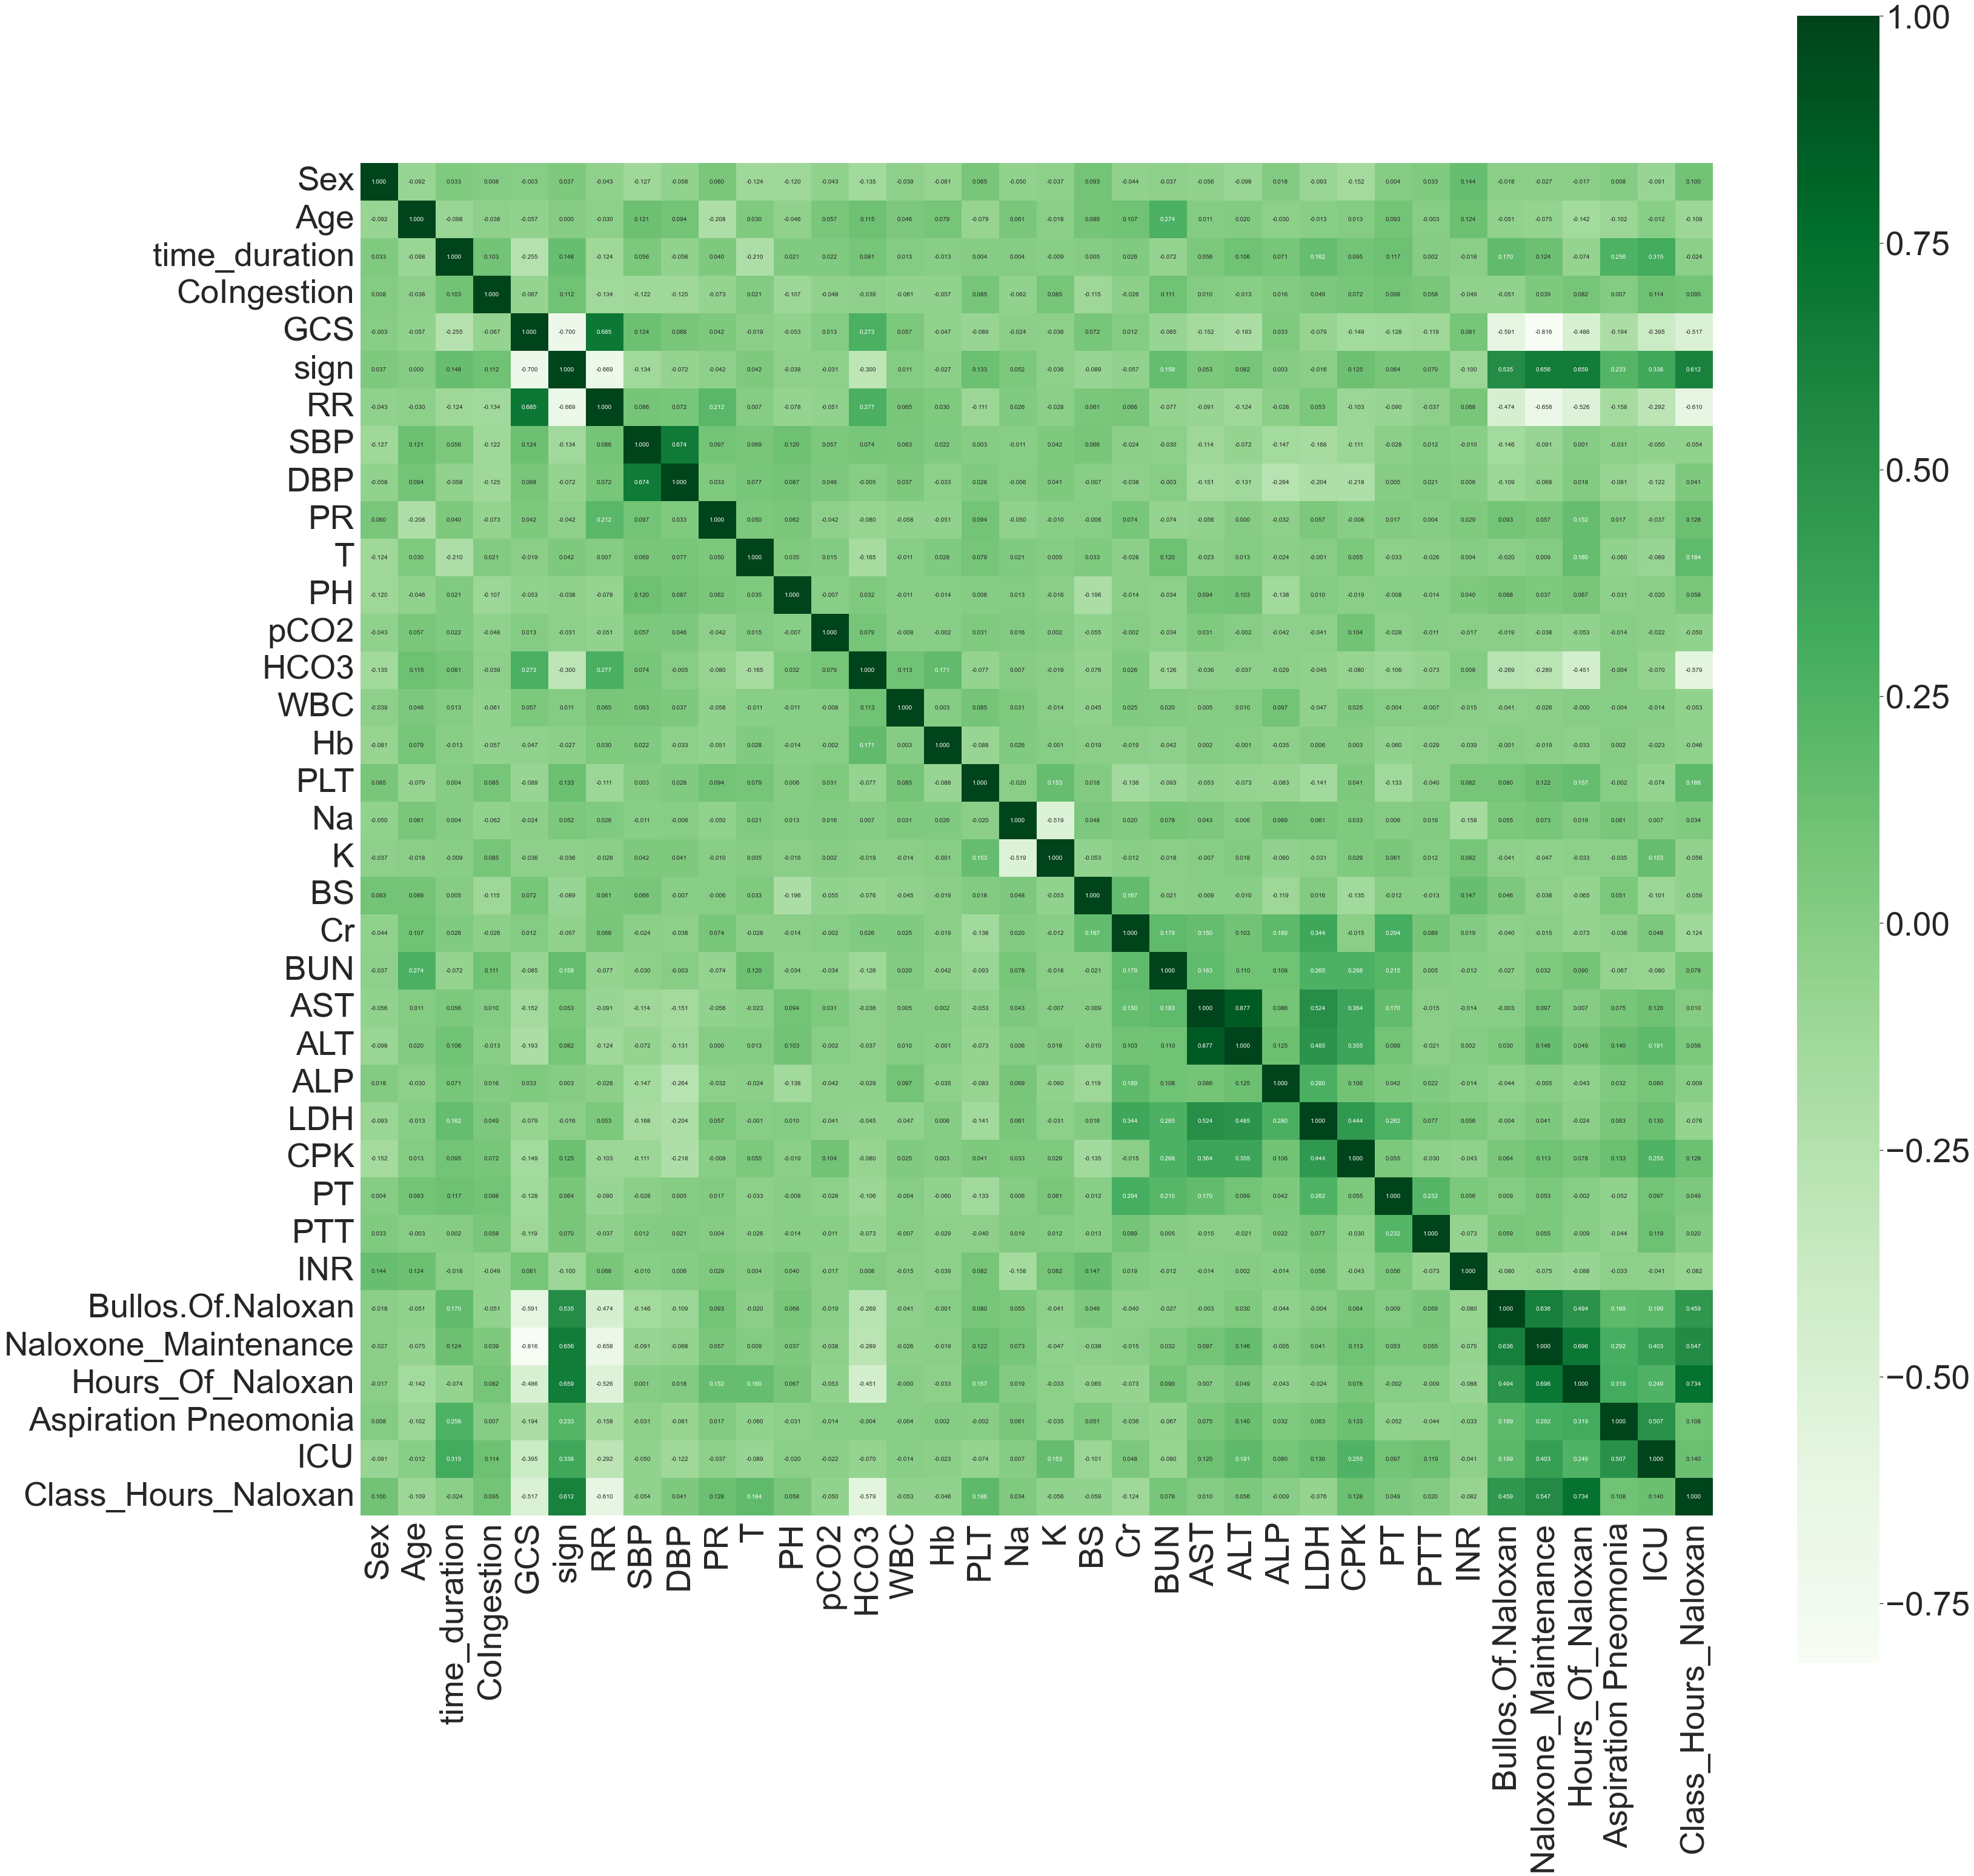

In [27]:
plt.figure(figsize=(50,50))

sns.heatmap(corr, cbar=True, square= True, fmt='.3f', annot=True, annot_kws={'size':10}, cmap='Greens')
# sns.set(font_scale=5)

In [ ]:
# sns.set(font_scale=1.4)
# cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
# sns.clustermap(data=corr, annot=True, fmt='d', cmap="Blues", annot_kws={"size": 16})

In [20]:
data_sel.describe()

,Sex,Age,time_duration,CoIngestion,GCS,sign,RR,SBP,DBP,PR,...,CPK,PT,PTT,INR,Bullos.Of.Naloxan,Naloxone_Maintenance,Hours_Of_Naloxan,Aspiration Pneomonia,ICU,Class_Hours_Naloxan
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,...,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,0.271493,36.488688,4.687783,0.343891,12.067873,1.959276,12.769231,116.864253,73.977376,87.162896,...,481.108597,14.535294,33.663348,1.359276,1.060181,16.539412,24.759276,0.063348,0.153846,0.371041
std,0.445739,16.825741,4.533440,0.476084,3.444351,1.799790,4.093915,18.313672,13.783865,17.156252,...,658.667337,5.129081,22.484812,1.857617,0.874668,22.839843,29.603949,0.244142,0.361620,0.484180
min,0.000000,12.000000,1.000000,0.000000,3.000000,0.000000,3.000000,70.000000,35.000000,48.000000,...,15.000000,10.500000,0.900000,0.900000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2.000000,0.000000,10.000000,0.000000,10.000000,105.000000,68.000000,80.000000,...,143.000000,12.500000,28.100000,1.010000,0.400000,1.600000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,32.000000,3.500000,0.000000,14.000000,1.000000,12.000000,120.000000,75.000000,87.000000,...,480.000000,14.000000,31.700000,1.130000,0.800000,7.200000,18.000000,0.000000,0.000000,0.000000
75%,1.000000,49.000000,4.000000,1.000000,15.000000,4.000000,16.000000,130.000000,80.000000,96.000000,...,480.000000,14.500000,33.600000,1.300000,1.600000,24.000000,48.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,23.000000,1.000000,15.000000,11.000000,26.000000,199.000000,106.000000,173.000000,...,4246.000000,64.200000,266.700000,26.600000,4.800000,181.600000,240.000000,1.000000,1.000000,1.000000


In [21]:
corr

,Sex,Age,time_duration,CoIngestion,GCS,sign,RR,SBP,DBP,PR,...,CPK,PT,PTT,INR,Bullos.Of.Naloxan,Naloxone_Maintenance,Hours_Of_Naloxan,Aspiration Pneomonia,ICU,Class_Hours_Naloxan
Sex,1.000000,-0.091711,0.033141,0.007851,-0.003175,0.036508,-0.042729,-0.127433,-0.058181,0.060168,...,-0.152398,0.003742,0.032881,0.143791,-0.017615,-0.027349,-0.017139,0.008316,-0.091107,0.099780
Age,-0.091711,1.000000,-0.098370,-0.038098,-0.057203,0.000360,-0.029700,0.121368,0.093946,-0.208271,...,0.012576,0.092525,-0.002965,0.124220,-0.051487,-0.075253,-0.142260,-0.101625,-0.012413,-0.108841
time_duration,0.033141,-0.098370,1.000000,0.102624,-0.254805,0.148014,-0.124274,0.056125,-0.057906,0.040310,...,0.094926,0.117082,0.001776,-0.017928,0.170404,0.124189,-0.074156,0.256148,0.315017,-0.023604
CoIngestion,0.007851,-0.038098,0.102624,1.000000,-0.066966,0.111906,-0.134009,-0.122349,-0.124874,-0.072558,...,0.072415,0.097760,0.058422,-0.049213,-0.051017,0.038586,0.082013,0.007255,0.113733,0.094670
GCS,-0.003175,-0.057203,-0.254805,-0.066966,1.000000,-0.699800,0.685470,0.124090,0.067626,0.042273,...,-0.148860,-0.127703,-0.118620,0.081301,-0.591447,-0.815629,-0.485855,-0.194326,-0.395254,-0.516681
sign,0.036508,0.000360,0.148014,0.111906,-0.699800,1.000000,-0.668770,-0.133523,-0.072411,-0.042327,...,0.125498,0.064414,0.070445,-0.099964,0.535451,0.656346,0.659185,0.233479,0.337917,0.612058
RR,-0.042729,-0.029700,-0.124274,-0.134009,0.685470,-0.668770,1.000000,0.086094,0.072161,0.211902,...,-0.102997,-0.090030,-0.037265,0.068474,-0.473649,-0.657689,-0.525898,-0.158122,-0.292154,-0.610153
SBP,-0.127433,0.121368,0.056125,-0.122349,0.124090,-0.133523,0.086094,1.000000,0.673721,0.096971,...,-0.111234,-0.027972,0.011645,-0.010350,-0.146308,-0.091479,0.000580,-0.030600,-0.050368,-0.054270
DBP,-0.058181,0.093946,-0.057906,-0.124874,0.067626,-0.072411,0.072161,0.673721,1.000000,0.033365,...,-0.217561,0.004608,0.020908,0.005618,-0.108845,-0.068234,0.018275,-0.080615,-0.122407,0.041447
PR,0.060168,-0.208271,0.040310,-0.072558,0.042273,-0.042327,0.211902,0.096971,0.033365,1.000000,...,-0.007787,0.016810,0.004084,0.029499,0.093336,0.057472,0.151947,0.017059,-0.037027,0.127850


In [ ]:
# Class_Hours_Naloxan----> GCS,sign,RR,HCO3,Bullos.Of.Naloxan,T

In [35]:
z =corr[['Naloxone_Maintenance','Hours_Of_Naloxan','Class_Hours_Naloxan']]

In [37]:
z.to_excel("a.xlsx")

In [23]:
corr[['Hours_Of_Naloxan']]

,Hours_Of_Naloxan
Sex,-0.017139
Age,-0.142260
time_duration,-0.074156
CoIngestion,0.082013
GCS,-0.485855
sign,0.659185
RR,-0.525898
SBP,0.000580
DBP,0.018275
PR,0.151947


In [ ]:
# Total_Naloxan---> GCS,sign,RR,Hco3,Bullos.Of.Naloxan,ICU


In [25]:
corr[['Naloxone_Maintenance']]

,Naloxone_Maintenance
Sex,-0.027349
Age,-0.075253
time_duration,0.124189
CoIngestion,0.038586
GCS,-0.815629
sign,0.656346
RR,-0.657689
SBP,-0.091479
DBP,-0.068234
PR,0.057472
